In [1]:
import os
import cv2
import sys
import glob
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from TMonitor import TMonitorConfig, TMonitorDataset
%matplotlib inline

# 项目根目录
ROOT_DIR = '../../'

# 导入库
sys.path.append(ROOT_DIR)  #加入代码库到根目录
from mrcnn.config import Config
from mrcnn import utils

## 加载训练集

In [2]:
# 配置文件
config = TMonitorConfig
# 训练数据的路径
dataset_dir = os.path.join(ROOT_DIR, 'data', 'all')
# 创建训练集
dataset_train = TMonitorDataset()
dataset_train.load_TMonitor(dataset_dir, 'train')
dataset_train.prepare()

## 查看训练集

In [3]:
# 读取标注(.json)文件的path查看id是否对应
# 数据的标注形式如下:
# {
# "path":"/home/huyu/dl/project/ZJ-TWB-Detection-End2End/data/15/clip_1/1.jpg",
# "outputs":{
#            "object":[
#                      {"name":"TWB","bndbox":{"xmin":371,"ymin":320,"xmax":568,"ymax":497}}
#                     ]
#           },
# "time_labeled":1528091763915,
# "labeled":true,
# "size":{"width":1280,"height":720,"depth":3}
# }

print('Num of Train Dataset =', len(dataset_train.image_info))
print('Example of Train Dataset :', dataset_train.image_info[0])

Num of Train Dataset = 1943
Example of Train Dataset : {'height': 720, 'path': '/home/huyu/dl/project/ZJ-TWB-Detection-End2End/data/all/train/clip2-15601.jpg', 'width': 1280, 'id': 'clip2-15601', 'source': 'TMonitor', 'objs': [{'name': 'TWB', 'bndbox': {'xmax': 380, 'xmin': 255, 'ymin': 342, 'ymax': 519}}, {'name': 'TWB', 'bndbox': {'xmax': 459, 'xmin': 358, 'ymin': 313, 'ymax': 463}}, {'name': 'TWB', 'bndbox': {'xmax': 562, 'xmin': 448, 'ymin': 300, 'ymax': 428}}]}


## 显示数据

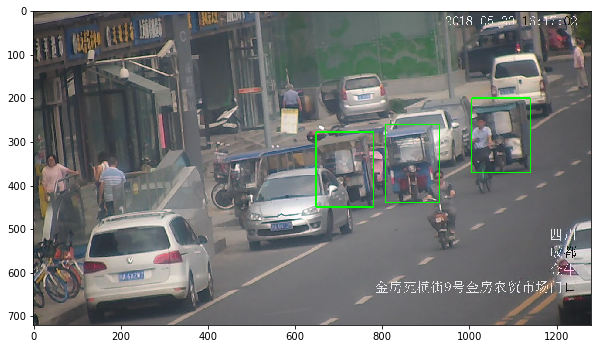

In [4]:
# 抽取数据进行展示，检查bbox的标注是否正确

img_info = dataset_train.image_info[686]
img_dir = img_info['path']
objs = img_info['objs']
img = mpimg.imread(img_dir)#读取图片
for obj in objs:
    x1, y1, x2, y2 = \
            obj['bndbox']['xmin'], obj['bndbox']['ymin'],\
            obj['bndbox']['xmax'], obj['bndbox']['ymax']
    img = cv2.rectangle(img, (x1,y1), (x2,y2), (0,255,0), 2)

plt.figure(figsize=(10,10))
plt.imshow(img)

## 显示resize和padding后的数据

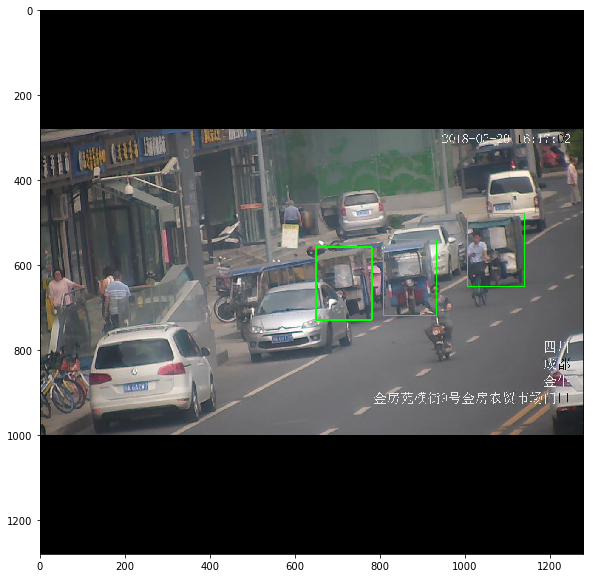

In [5]:
img, window, scale, padding, crop = utils.resize_image(
        img,
        min_dim=config.IMAGE_MIN_DIM,
        min_scale=config.IMAGE_MIN_SCALE,
        max_dim=config.IMAGE_MAX_DIM,
        mode=config.IMAGE_RESIZE_MODE)

bboxes = []
for obj in objs:
    x1, y1, x2, y2 = \
            obj['bndbox']['xmin'], obj['bndbox']['ymin'],\
            obj['bndbox']['xmax'], obj['bndbox']['ymax']
    bboxes.append(np.array([y1,x1,y2,x2]))
bboxes = np.array(bboxes)
bboxes = utils.resize_bboxes(bboxes, img.shape[0:2], scale, padding)

for bbox in bboxes:
    img = cv2.rectangle(img, (bbox[1],bbox[0]), (bbox[3],bbox[2]), (0,255,0), 2)

plt.figure(figsize=(10,10))
plt.imshow(img)